Dataset: https://www.kaggle.com/datasets/macrosynergy/fixed-income-returns-and-macro-trends


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('JPMaQS_Quantamental_Indicators.csv')

print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0   real_date  cid              xcat     value  grading  eop_lag  \
0           0  2000-01-03  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     95.0   
1           1  2000-01-04  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     96.0   
2           2  2000-01-05  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     97.0   
3           3  2000-01-06  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     98.0   
4           4  2000-01-07  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     99.0   

   mop_lag  
0    292.0  
1    293.0  
2    294.0  
3    295.0  
4    296.0  


This dataset has eight columns: unnamed: 0, real_date, cid, xcat, value, grading, eop_lag, and mop_lag. The Unnamed: 0 column appears to be an index column, which was likely generated during the data export process and may not be required for our study. The real_date column contains the date linked with each entry, which is critical for time series analysis. The cid column contains the currency identifier, such as AUD for Australian Dollar, which indicates the financial instrument's currency. The xcat column categorizes the quantitative indicators, giving context to the value column, which contains the actual indicator values. The grade column most likely indicates the dependability or usefulness of the value data. Furthermore, the eop_lag and mop_lag columns show the end-of-period and middle-of-period lags, respectively, which may provide insight into reporting delays.


In [42]:
print("\nSummary of the dataset:")
print(df.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390059 entries, 0 to 3390058
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   real_date   object 
 2   cid         object 
 3   xcat        object 
 4   value       float64
 5   grading     float64
 6   eop_lag     float64
 7   mop_lag     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 206.9+ MB
None


The dataset's  states that it has 3,390,059 entries across 8 columns. The dataset consists of both numerical and categorical data kinds. Unnamed columns include 0 as an integer, real_date, cid, and xcat as objects (usually strings), and value, grading, eop_lag, and mop_lag as floating-point integers.

In [43]:
print("\nDescriptive statistics of the dataset:")
print(df.describe())


Descriptive statistics of the dataset:
         Unnamed: 0         value       grading       eop_lag       mop_lag
count  3.390059e+06  3.390059e+06  3.390059e+06  3.390059e+06  3.390059e+06
mean   1.695029e+06  1.977237e+00  1.366171e+00  1.715745e+01  1.412662e+02
std    9.786259e+05  4.441622e+00  5.322838e-01  2.811768e+01  2.457459e+02
min    0.000000e+00 -4.894521e+01  1.000000e+00 -3.000000e+01 -1.500000e+01
25%    8.475145e+05  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
50%    1.695029e+06  7.496109e-01  1.000000e+00  0.000000e+00  2.900000e+01
75%    2.542544e+06  2.846841e+00  2.000000e+00  3.100000e+01  2.250000e+02
max    3.390058e+06  3.940715e+02  3.000000e+00  3.550000e+02  1.450000e+03


Unnamed: 0: This column seems to be an index, ranging from 0 to 3,390,058. The mean value of 1,695,029 indicates a uniform distribution of indices.

Value: The value column has a mean of 1.977 and a standard deviation of 4.442, indicating a high variance in the data. The minimum value is -48.945, and the maximum is 394.071, suggesting the presence of significant outliers.

Grading: The grading column ranges from 1 to 3, with distinct peaks at 1, 2, and 3 as indicated by the quartiles 25%, 50%, and 75% all aligning with these values. The standard deviation is relatively low at 0.532, showing that the grades are fairly consistent.

Eop_lag: The eop_lag column has a mean of 17.157 and a standard deviation of 28.118, with values ranging from -30 to 355. The presence of negative values indicates potential issues with lag data.

Mop_lag: Similar to eop_lag, the mop_lag column has a high variance, with a mean of 141.266 and a standard deviation of 245.746. The values range from -15 to 1450, suggesting significant outliers and possibly erroneous data entries.

In [44]:
print("\nMissing values in the dataset:")
missing_values = df.isnull().sum()
print(missing_values)


Missing values in the dataset:
Unnamed: 0    0
real_date     0
cid           0
xcat          0
value         0
grading       0
eop_lag       0
mop_lag       0
dtype: int64


There are no missing values in any of the columns of the dataset. This is beneficial for our analysis as it eliminates the need for handling missing data.

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\nData types:")
print(df.dtypes)

print("\nShape of the dataset:")
print(df.shape)


Data types:
Unnamed: 0      int64
real_date      object
cid            object
xcat           object
value         float64
grading       float64
eop_lag       float64
mop_lag       float64
dtype: object

Shape of the dataset:
(3390059, 8)


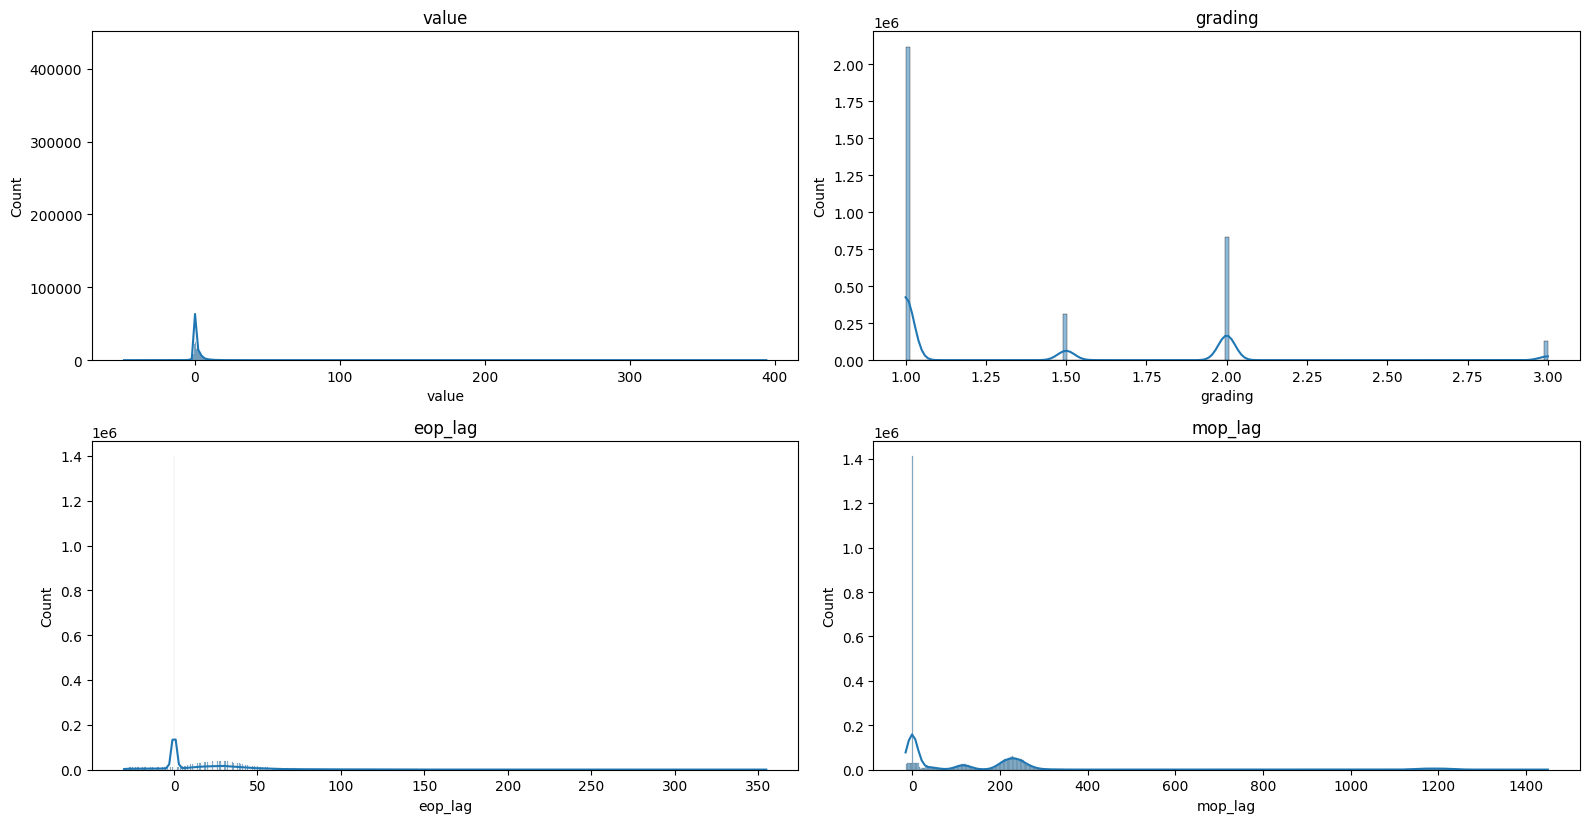

In [51]:
numerical_cols = ['value', 'grading', 'eop_lag', 'mop_lag']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Value:The value column has a significantly skewed distribution, with the majority of the values clustered at 0. This suggests a large number of low-value entries, with a few high-value outliers.

Grading: The grading column has distinct peaks at certain values, showing categorization behavior within the range of 1 to 3. This implies that some grades are issued more frequently than others, indicating varying levels of grading criteria.

Eop_lag:The eop_lag column has a highly skewed distribution, with the majority of values near zero and a few outliers reaching to higher values. This shows that, while most data points have negligible end-of-period lag, some have much longer delays.

Mop_lag: Like eop_lag, the mop_lag column has a skewed distribution, with most values near 0 but some outliers reaching very high values. This suggests the presence of a few data points with significant middle-of-period lags.


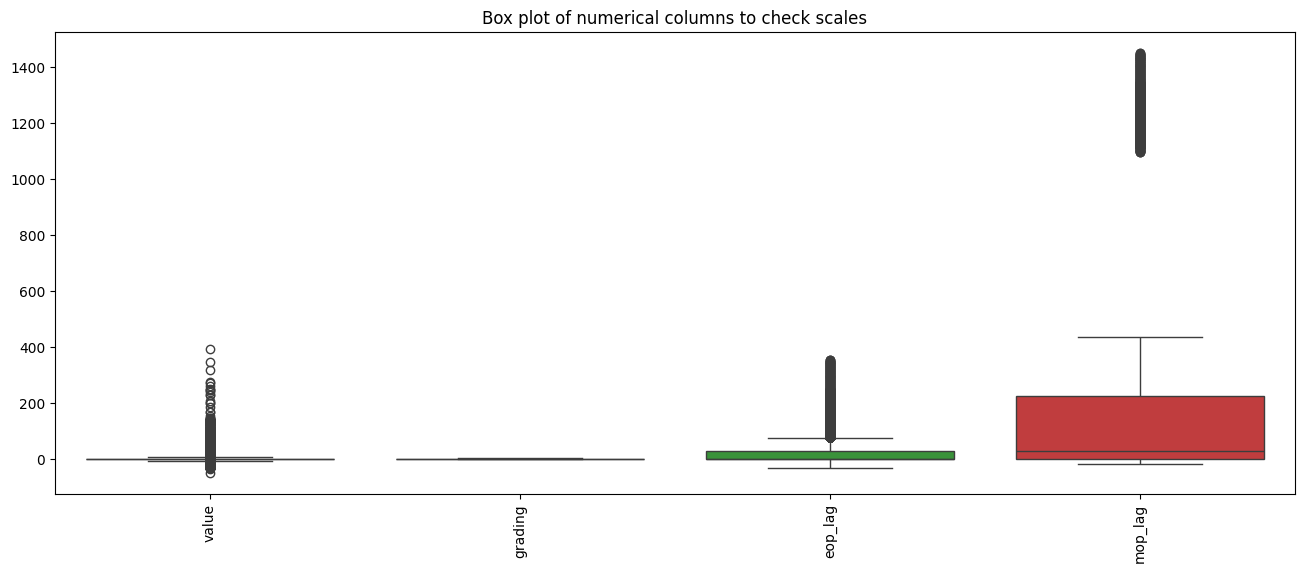

In [47]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title('Box plot of numerical columns to check scales')
plt.show()

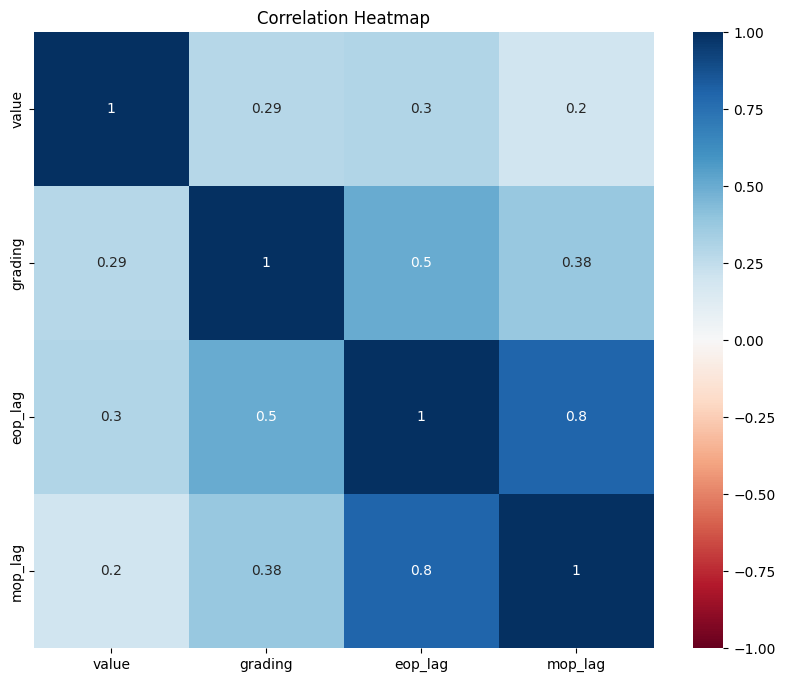

In [52]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

The value column has a weak positive connection with grading 0.29, eop_lag 0.3, and mop_lag 0.2, indicating that these metrics tend to increase together. The grading column has a moderate positive connection with eop_lag 0.5 but a weaker one with mop_lag 0.38, indicating that better grades are associated with longer end-of-period and middle-of-period lags. Notably, the eop_lag and mop_lag columns have a substantial positive correlation 0.8, indicating that these lags tend to increase together.

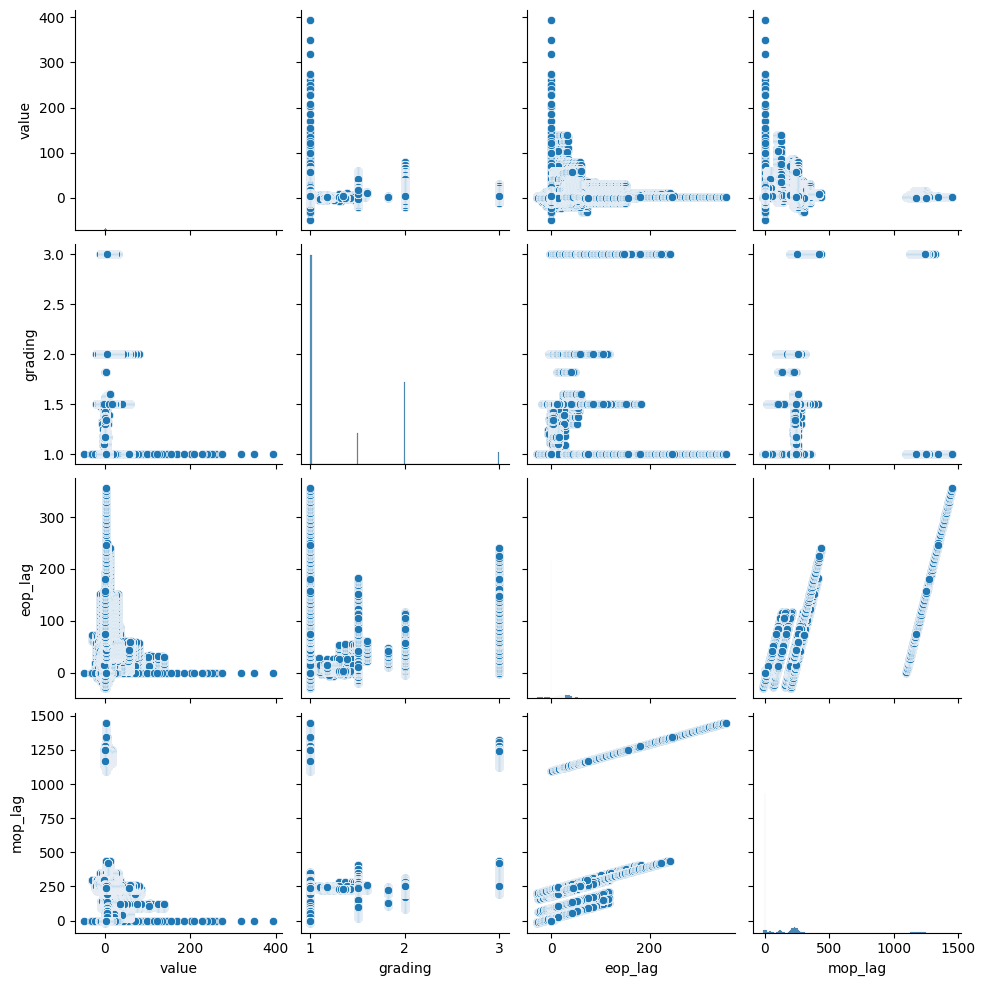

In [53]:
sns.pairplot(df[numerical_cols])
plt.show()

Notably eop_lag and mop_lag have a strong linear relationship, which is consistent with their high correlation coefficient of 0.8. Similarly, scatter plots show that grading is more widely distributed than other variables, but with identifiable peaks at certain grades.

In [54]:
df['value'] = df['value'] + 1e-6
df['eop_lag'] = df['eop_lag'] + 1e-6
df['mop_lag'] = df['mop_lag'] + 1e-6

df['log_value'] = np.log1p(df['value'])
df['log_eop_lag'] = np.log1p(df['eop_lag'])
df['log_mop_lag'] = np.log1p(df['mop_lag'])

scaler = StandardScaler()
df[['log_value', 'log_eop_lag', 'log_mop_lag']] = scaler.fit_transform(df[['log_value', 'log_eop_lag', 'log_mop_lag']])

print("Transformed and scaled data:")
print(df[['log_value', 'log_eop_lag', 'log_mop_lag']].head())

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Transformed and scaled data:
   log_value  log_eop_lag  log_mop_lag
0    0.10688     1.350110     1.007758
1    0.10688     1.355150     1.008974
2    0.10688     1.360139     1.010187
3    0.10688     1.365077     1.011396
4    0.10688     1.369966     1.012600


The log transformation and scaling to address skewness and standardize the numerical columns value, eop_lag, and mop_lag.

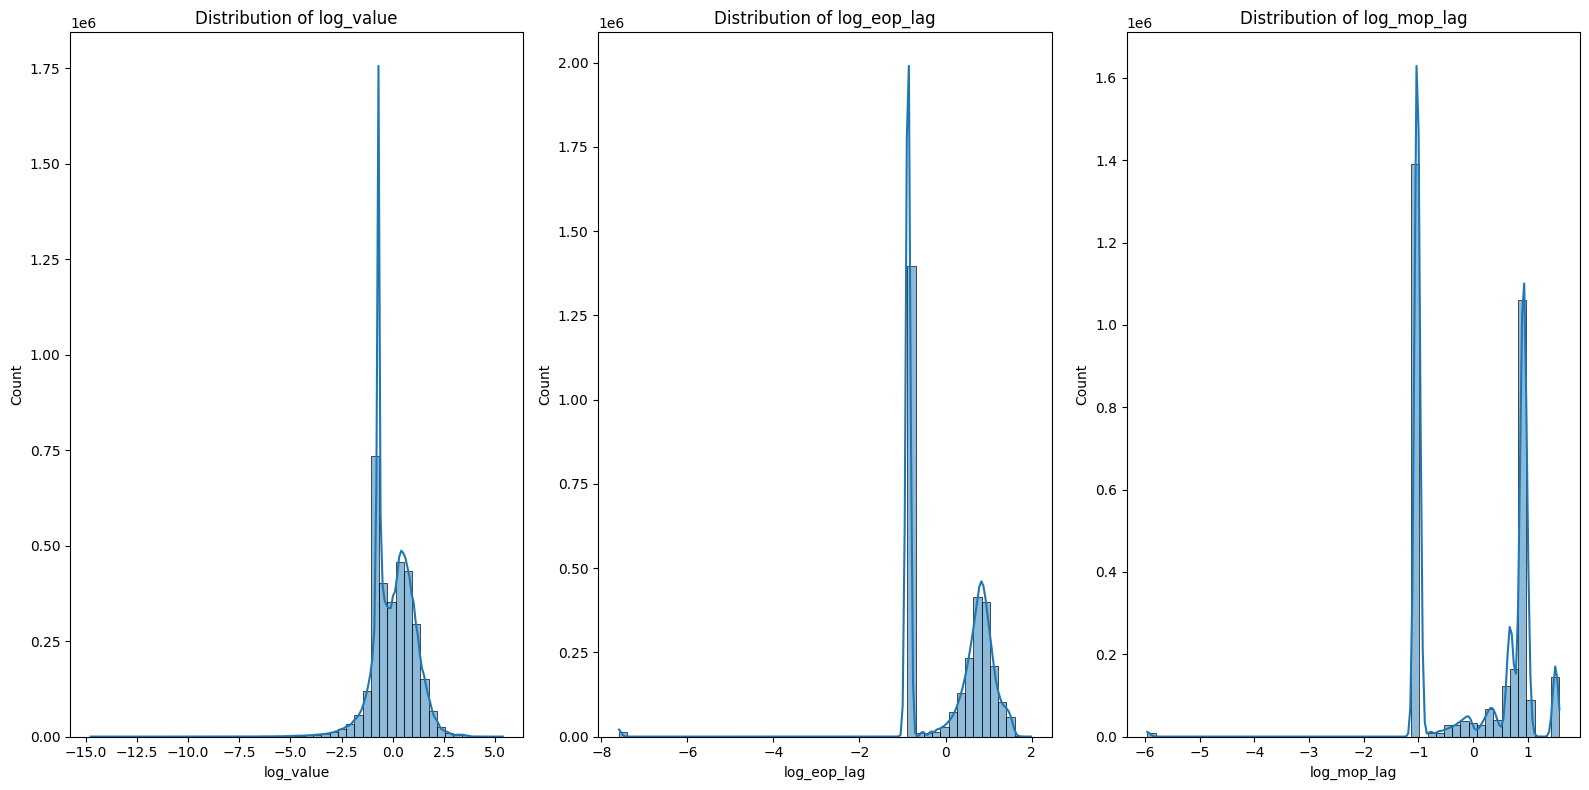

In [55]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(['log_value', 'log_eop_lag', 'log_mop_lag']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

The log_value column now exhibits a distribution that is more centered around 0, with less skewness than the original value column. However, there are some extreme numbers on the negative side, indicating that zero or near-zero initial values became negative after log translation.The log_eop_lag column displays two peaks. One peak near -6 indicates the presence of extremely small original values close to zero but positive. The primary peak is located between 0 and 2, indicating that most values are normalized following transformation. The log_mop_lag column exhibits a distribution similar to log_eop_lag, with a strong peak between 0 and 2. However, there are smaller peaks and a few negative values, which indicate some of the original values.

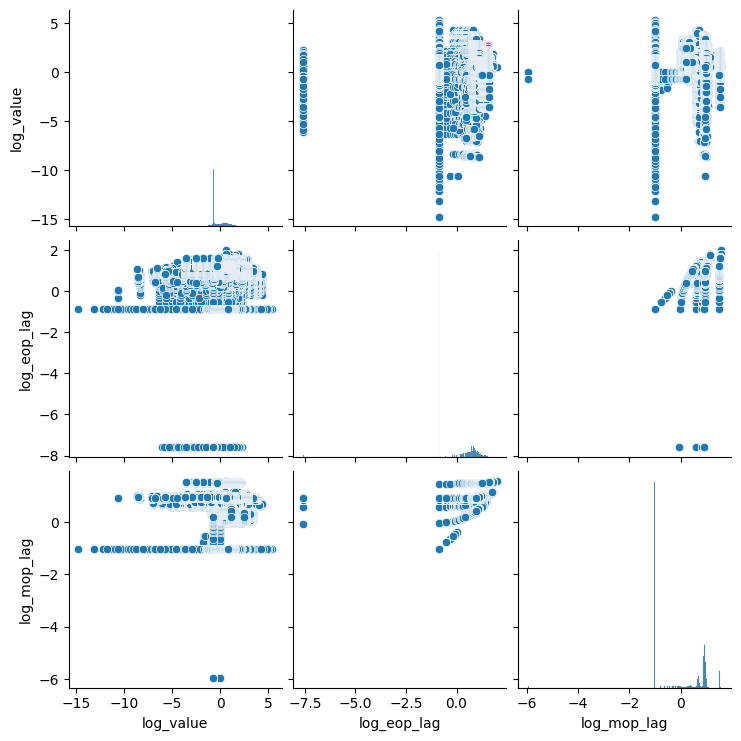

In [56]:
sns.pairplot(df[['log_value', 'log_eop_lag', 'log_mop_lag']])
plt.show()

Log Value vs. Log EOP Lag: The scatter plot shows a cluster of values around a specific range, with a clear separation between low and high values. The distribution is more spread out, indicating variability in the log-transformed values.
Log Value vs. Log MOP Lag: This scatter plot also shows a concentration of values around a central range, with some spread indicating variability. There are distinct clusters which may indicate different behaviors or regimes in the data.
Log EOP Lag vs. Log MOP Lag: A strong positive linear relationship is observed, indicating that as the end-of-period lag increases, the middle-of-period lag also tends to increase. This suggests that these two features are highly correlated.

In [57]:
print("\nDescriptive statistics of the transformed columns:")
print(df[['log_value', 'log_eop_lag', 'log_mop_lag']].describe())


Descriptive statistics of the transformed columns:
          log_value   log_eop_lag   log_mop_lag
count  3.198107e+06  3.097211e+06  3.263467e+06
mean   6.933314e-16 -4.768869e-16 -6.390355e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.475431e+01 -7.590005e+00 -5.954768e+00
25%   -7.145737e-01 -8.700262e-01 -1.020812e+00
50%   -2.858643e-02  2.963293e-01  3.465171e-01
75%    6.962852e-01  8.307034e-01  9.166095e-01
max    5.361532e+00  1.987588e+00  1.579109e+00


The transformation and scaling have effectively standardized the data.


Unique values in 'cid' column:
['AUD' 'CAD' 'CHF' 'CLP' 'COP' 'CZK' 'EUR' 'GBP' 'HUF' 'IDR' 'ILS' 'INR'
 'JPY' 'KRW' 'MXN' 'NOK' 'NZD' 'PLN' 'SEK' 'THB' 'TRY' 'TWD' 'USD' 'ZAR']


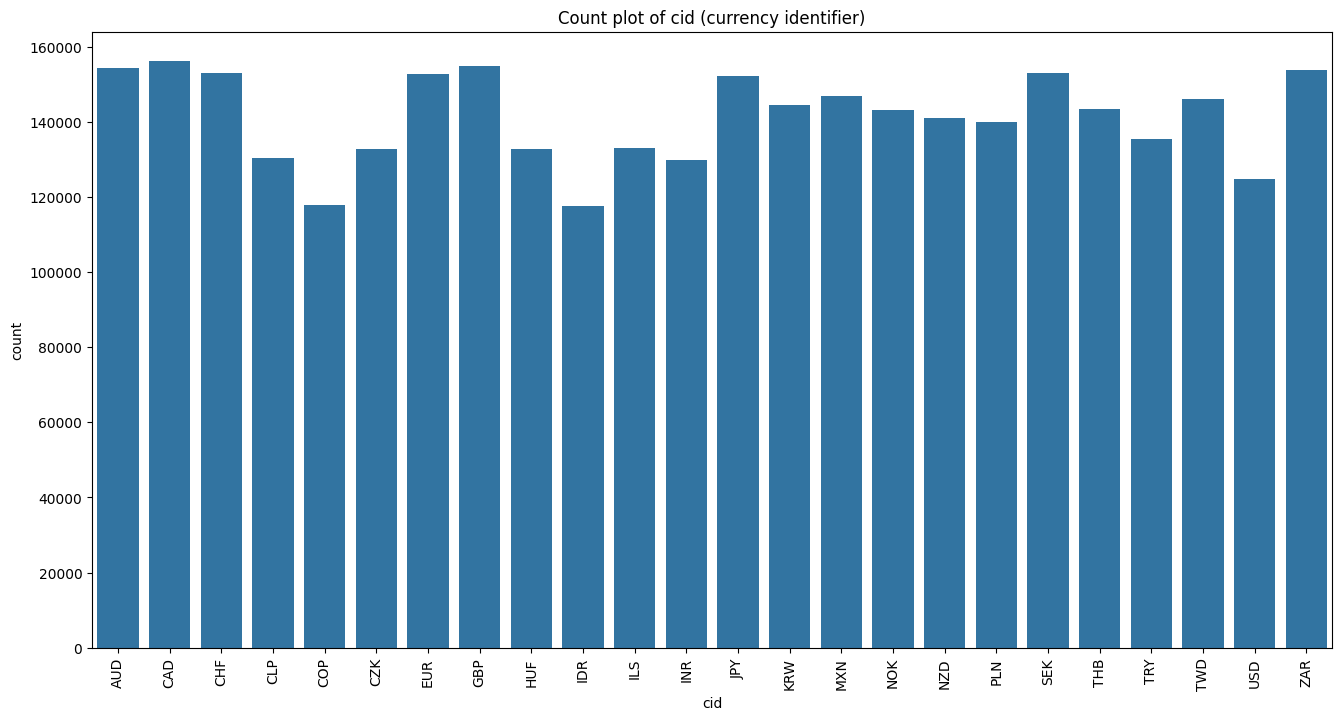

In [58]:
print("\nUnique values in 'cid' column:")
print(df['cid'].unique())

plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='cid')
plt.xticks(rotation=90)
plt.title('Count plot of cid (currency identifier)')
plt.show()


Unique values in 'xcat' column:
['CPIC_SA_P1M1ML12' 'CPIC_SJA_P3M3ML3AR' 'CPIC_SJA_P6M6ML6AR'
 'CPIH_SA_P1M1ML12' 'CPIH_SJA_P3M3ML3AR' 'CPIH_SJA_P6M6ML6AR'
 'DU02YXR_NSA' 'DU02YXR_VT10' 'DU05YXR_NSA' 'DU05YXR_VT10' 'EQXR_NSA'
 'EQXR_VT10' 'FXCRR_NSA' 'FXTARGETED_NSA' 'FXUNTRADABLE_NSA' 'FXXR_NSA'
 'FXXR_VT10' 'INFTEFF_NSA' 'INTRGDP_NSA_P1M1ML12_3MMA'
 'INTRGDPv5Y_NSA_P1M1ML12_3MMA' 'PCREDITBN_SJA_P1M1ML12'
 'PCREDITGDP_SJA_D1M1ML12' 'RGDP_SA_P1Q1QL4_20QMA' 'RYLDIRS02Y_NSA'
 'RYLDIRS05Y_NSA']


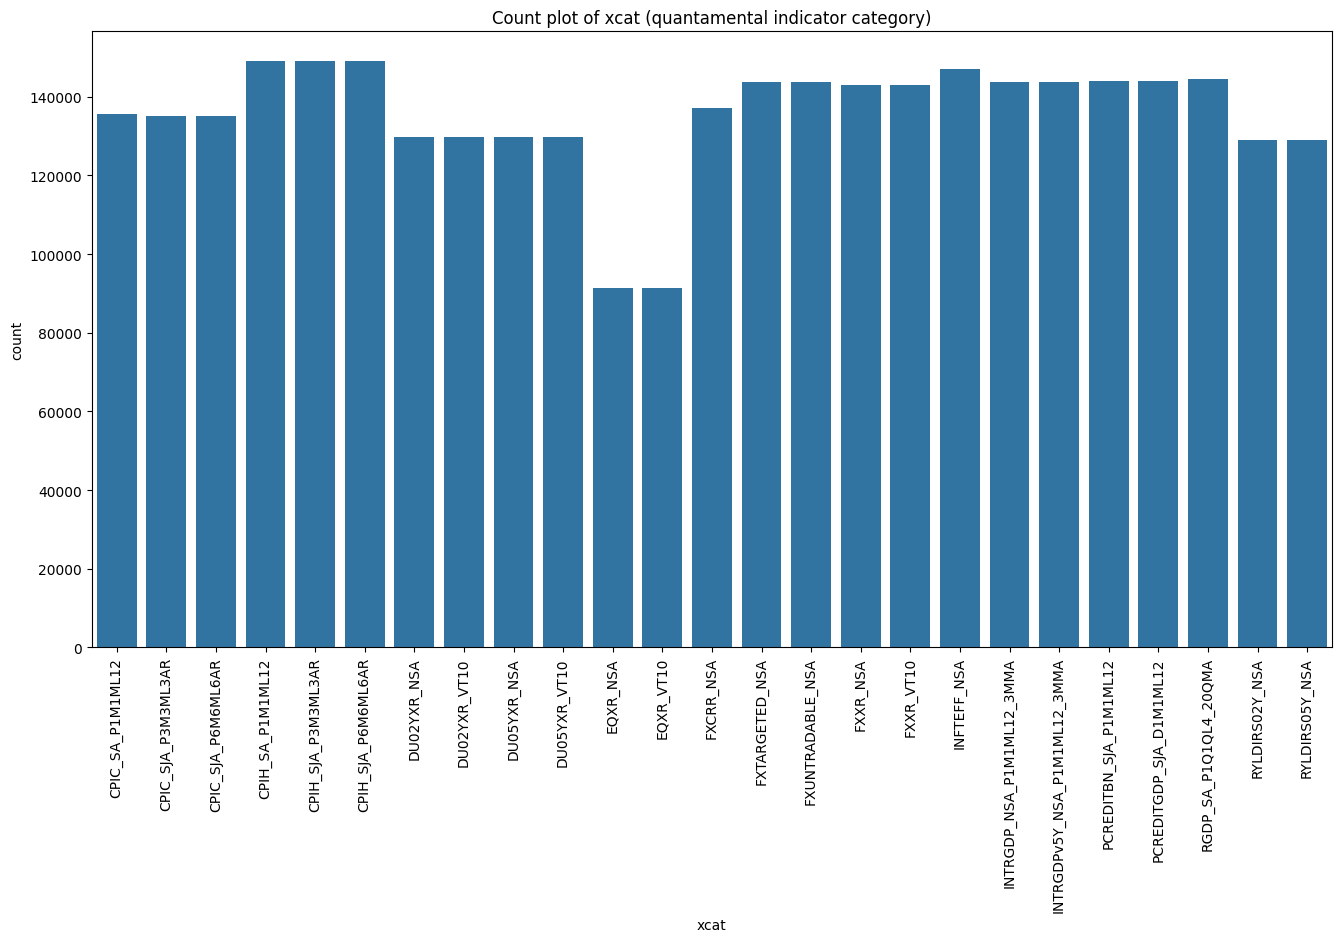

In [59]:
print("\nUnique values in 'xcat' column:")
print(df['xcat'].unique())

plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='xcat')
plt.xticks(rotation=90)
plt.title('Count plot of xcat (quantamental indicator category)')
plt.show()

The count plot depicts the frequency distribution of the dataset's quantitative indicator categories xcat. The numbers vary greatly, with most categories having between 120,000 and 150,000 observations. However, other categories, such as 'INTEFF_NSA' and 'DU02XYR_VT10', have fewer observations 80,000 to 100,000.

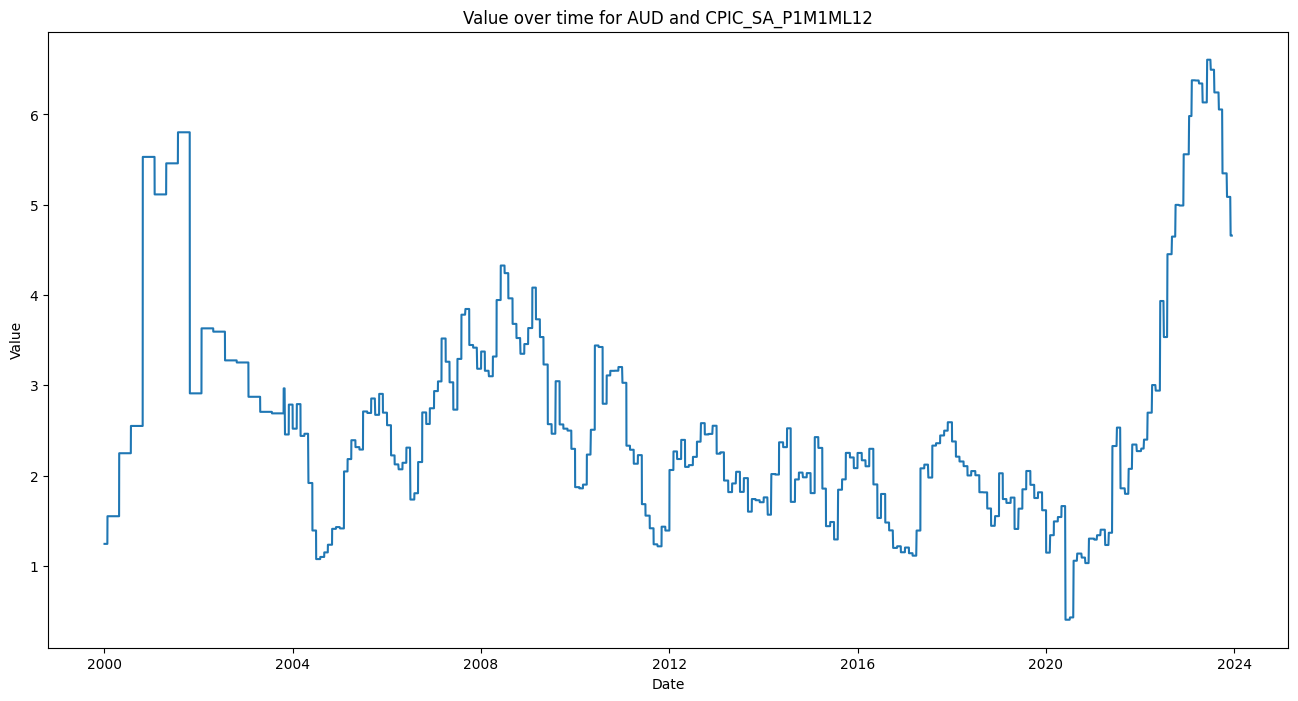

In [60]:
df['real_date'] = pd.to_datetime(df['real_date'])

df_filtered = df[(df['cid'] == 'AUD') & (df['xcat'] == 'CPIC_SA_P1M1ML12')]

plt.figure(figsize=(16, 8))
plt.plot(df_filtered['real_date'], df_filtered['value'])
plt.title('Value over time for AUD and CPIC_SA_P1M1ML12')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

The graphic runs from 2000 to 2024 and shows several peaks and troughs in the 'value'. Notably, there is a considerable increase around 2020, with a peak value in 2022-2023 before dropping again. This visualization demonstrates that the 'value' fluctuates significantly over time, which could be influenced by numerous macroeconomic factors or market situations.

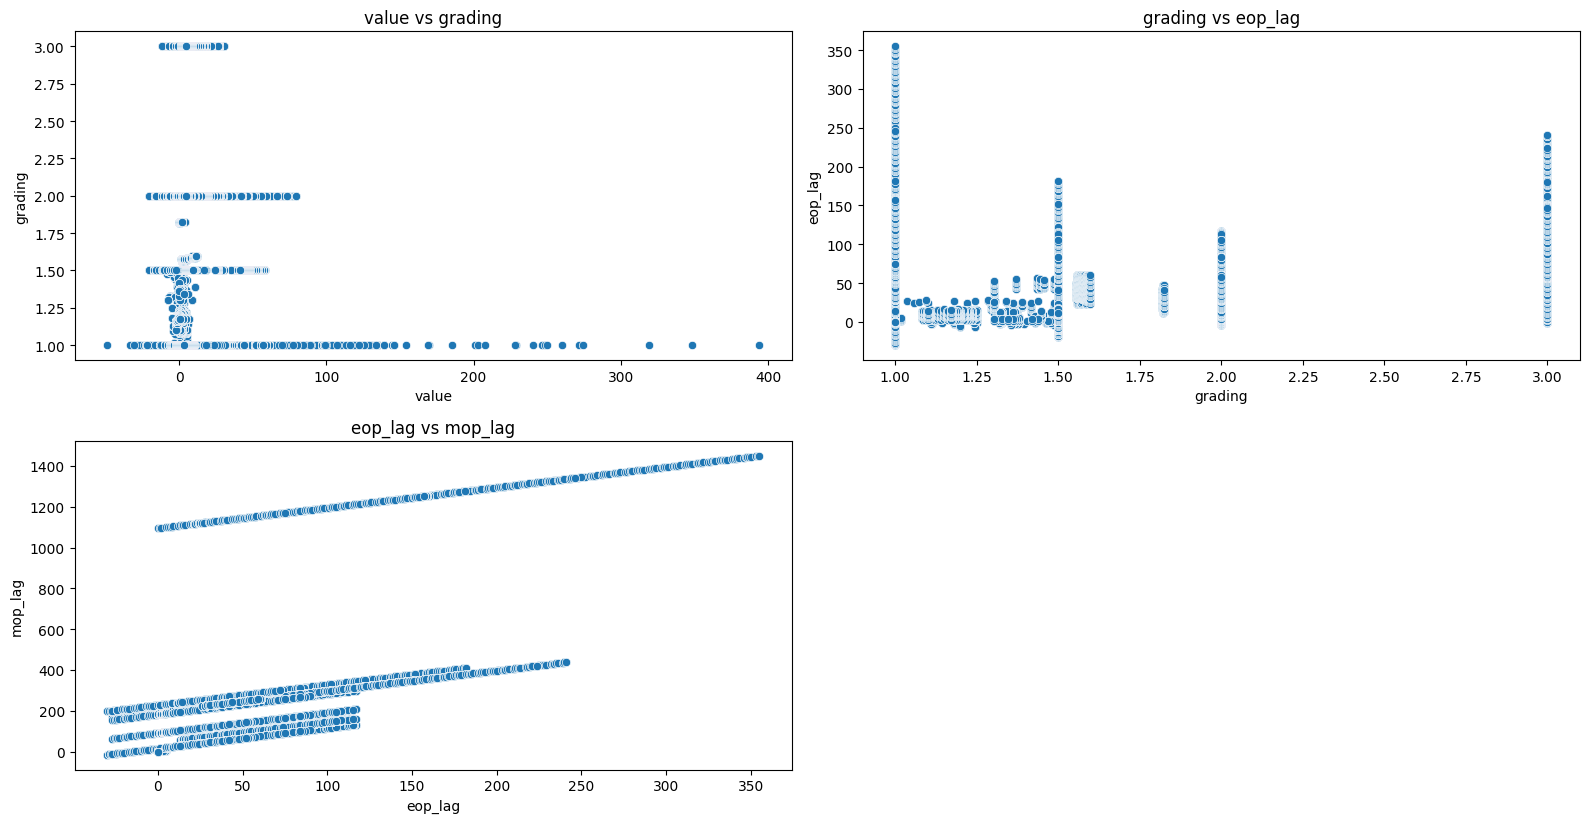

In [61]:
plt.figure(figsize=(16, 12))
for i, (col1, col2) in enumerate(zip(numerical_cols[:-1], numerical_cols[1:])):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)
    sns.scatterplot(data=df, x=col1, y=col2)
    plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()

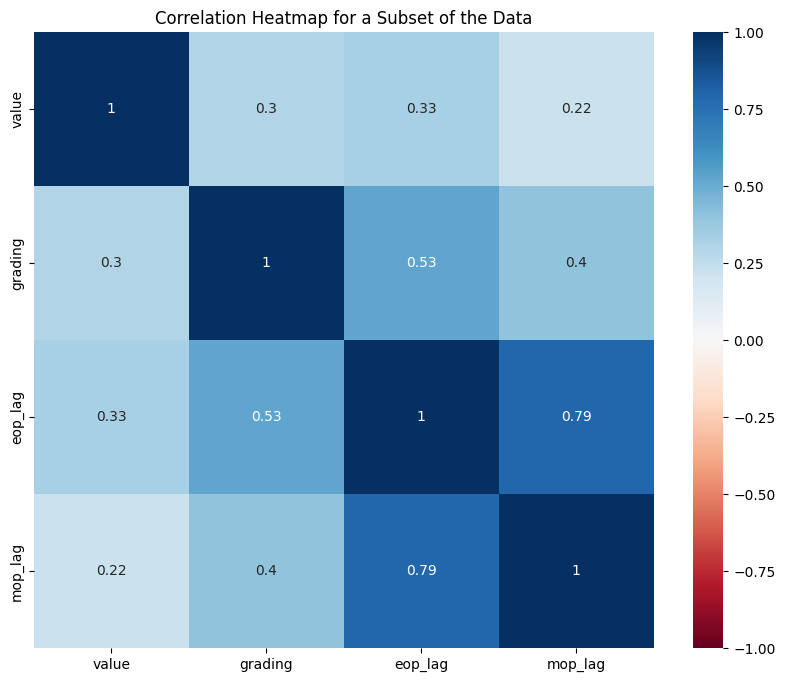

In [62]:
subset = df.sample(n=10000, random_state=42)

corr_matrix_subset = subset[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_subset, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap for a Subset of the Data')
plt.show()

The value variable has a somewhat positive association with grading 0.3, eop_lag 0.33, and a weak correlation with mop_lag 0.22. The grading variable has a strong positive connection with eop_lag 0.53 and a moderate association with mop_lag 0.4, indicating that higher grading values correspond to longer eop_lag and mop_lag. The eop_lag variable has a substantial correlation with both grading 0.53 and mop_lag 0.79, showing that as the end-of-period lag grows, so does the middle-of-period lag. Similarly, mop_lag correlates strongly with eop_lag 0.79 and moderately with grading 0.4.
